In [27]:
!uv pip install matplotlib
!uv pip install seaborn

Audited 1 package in 4ms
Resolved 15 packages in 379ms                                        
Prepared 1 package in 134ms                                              
Installed 1 package in 3ms                                  
 + seaborn==0.13.2


In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os


In [2]:
load_dotenv()

db_user = os.getenv("POSTGRES_USER")
db_password = os.getenv("POSTGRES_PASSWORD")
db_host = os.getenv("POSTGRES_HOST")
db_port = os.getenv("POSTGRES_PORT")
db_name = os.getenv("POSTGRES_DB")

In [3]:
connection_string = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)

In [4]:
try:
    with engine.connect() as conexion:
        print("¡Conexión exitosa!")
except Exception as e:
    print("Error al conectar a la base de datos:", e)

¡Conexión exitosa!


## Análisis Descriptivo y Visualización de Datos

In [7]:
df_customer = pd.read_sql("SELECT * FROM star_schema.dim_customer;", engine)
df_date = pd.read_sql("SELECT * FROM star_schema.dim_date;", engine)
df_sale = pd.read_sql("SELECT * FROM star_schema.fact_sale;", engine)
df_product = pd.read_sql("SELECT * FROM star_schema.dim_product;", engine)

In [9]:
print("Dim Customer:")
df_customer.head()

Dim Customer:


,customer_key,customer_id,gender,age
0,415073b8e6f62ed04792898aaeaa351d,C241288,Female,28
1,7d9b71e2744b6f4155ed5d59bbf35d48,C111565,Male,21
2,630671d599417dd4bf161fc56fd087fd,C266599,Male,20
3,62ffd05906541f0a90f899a753d416cb,C988172,Female,66
4,83c9df8b719b5e8965668733ea30bba5,C189076,Female,53


In [10]:
print("\nDim Date:")
df_date.head()


Dim Date:


,date_key,day_of_week,month,quarter,year
0,01/01/2020,1.0,1.0,1.0,2020.0
1,02/01/2020,2.0,1.0,1.0,2020.0
2,03/01/2020,3.0,1.0,1.0,2020.0
3,04/01/2020,4.0,1.0,1.0,2020.0
4,05/01/2020,5.0,1.0,1.0,2020.0


In [11]:
print("\nFact Sale:")
df_sale.head()


Fact Sale:


,fact_sale_key,sale_id,customer_key,product_key,date_key,payment_method,shopping_mall
0,12005c5c9439379d0c17352187faa92a,I138884,415073b8e6f62ed04792898aaeaa351d,e136ade8da766c699153e7d7f43f6b21,5/8/2022,Credit Card,Kanyon
1,2284a6264034310c2f4465ad8b2dccbf,I317333,7d9b71e2744b6f4155ed5d59bbf35d48,f836118c86e60395e926aa01392454f1,12/12/2021,Debit Card,Forum Istanbul
2,2dca00f5011370f6c720e7caa7b26d63,I127801,630671d599417dd4bf161fc56fd087fd,c05c235de277b35356f6a80f1a40d6b7,9/11/2021,Cash,Metrocity
3,c13ee3315ecce18398d183e80100972a,I173702,62ffd05906541f0a90f899a753d416cb,35224cb09f00df5fe8715ac965461615,16/05/2021,Credit Card,Metropol AVM
4,e75711c77fa37ab3826dc8a38276de95,I337046,83c9df8b719b5e8965668733ea30bba5,fb154d6e72ed82e3aa21e66d3d7bb4b4,24/10/2021,Cash,Kanyon


In [12]:
print("\nDim Product:")
df_product.head()


Dim Product:


,product_key,product_id,category,quantity,price
0,e136ade8da766c699153e7d7f43f6b21,I138884,Clothing,5,1500.40
1,f836118c86e60395e926aa01392454f1,I317333,Shoes,3,1800.51
2,c05c235de277b35356f6a80f1a40d6b7,I127801,Clothing,1,300.08
3,35224cb09f00df5fe8715ac965461615,I173702,Shoes,5,3000.85
4,fb154d6e72ed82e3aa21e66d3d7bb4b4,I337046,Books,4,60.60


/tmp/ipykernel_31120/1057118038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_categoria, x='category', y='sale_id', palette='Blues')


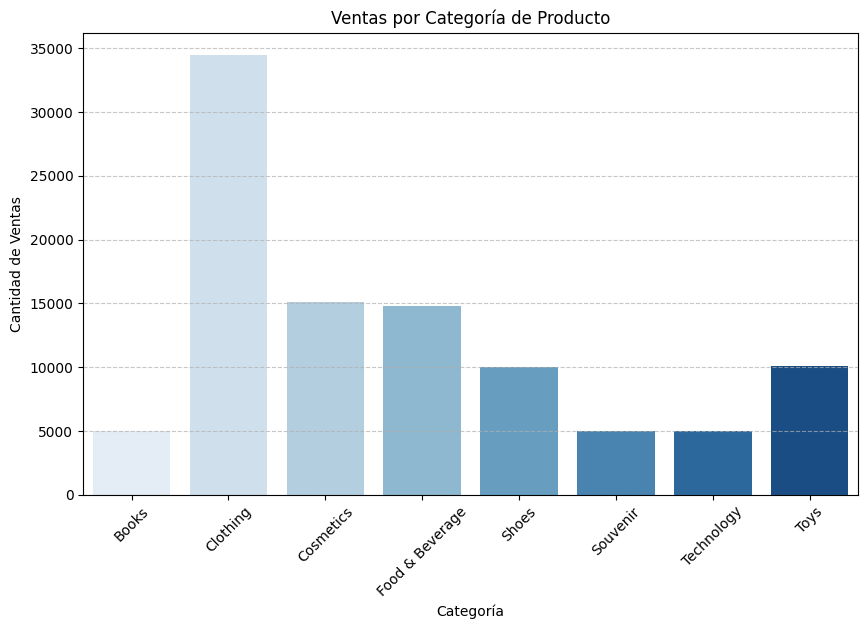

In [39]:
# Obtener datos de ventas por categoría
ventas_por_categoria = df_sale.merge(df_product, on='product_key').groupby('category')['sale_id'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_por_categoria, x='category', y='sale_id', palette='Blues')
plt.title('Ventas por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


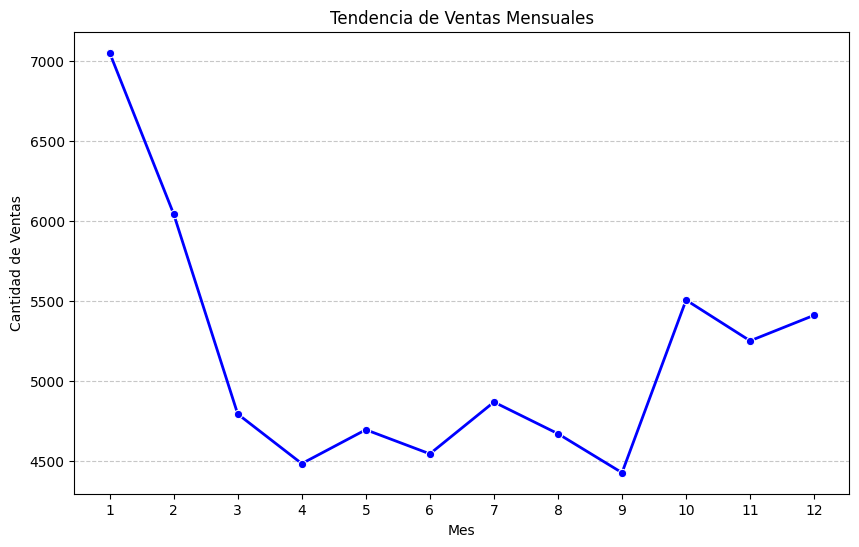

In [38]:
# Obtener datos de ventas mensuales
ventas_mensuales = df_sale.merge(df_date, on='date_key').groupby('month')['sale_id'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='month', y='sale_id', marker='o', color='b', linewidth=2)
plt.title('Tendencia de Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.xticks(ventas_mensuales['month'])  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


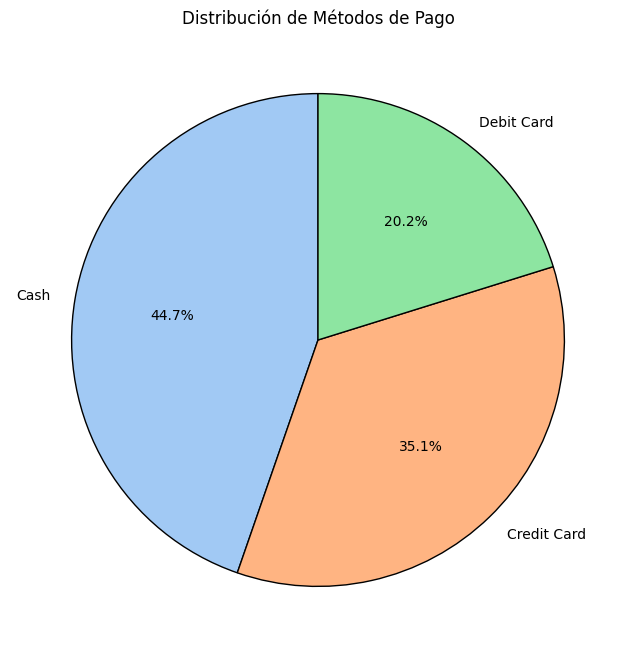

In [37]:
# Obtener la distribución de métodos de pago
distribucion_pago = df_sale['payment_method'].value_counts().reset_index()
distribucion_pago.columns = ['payment_method', 'count']
plt.figure(figsize=(8, 8))
plt.pie(distribucion_pago['count'], labels=distribucion_pago['payment_method'], 
        autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribución de Métodos de Pago')
plt.show()

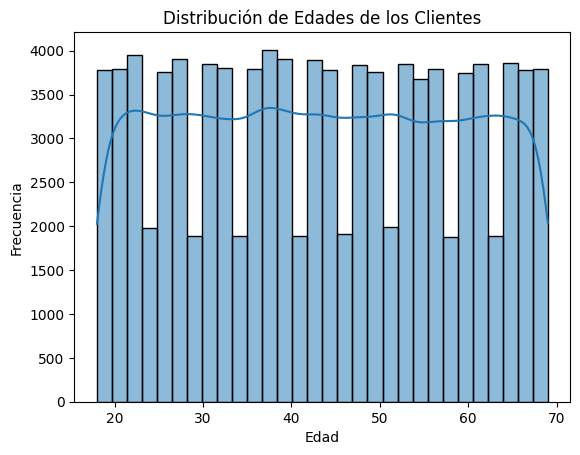

In [35]:
# Histograma para distribución de edades de los clientes
sns.histplot(df_customer['age'], bins=30, kde=True)
plt.title('Distribución de Edades de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()